<h1>Valores de las acciones de Samsung</h1>

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Samsung_Logo.svg/1600px-Samsung_Logo.svg.png>

https://es.finance.yahoo.com/quote/005930.KS?p=005930.KS&.tsrc=fin-srch

In [27]:
# pip install --upgrade threadpoolctl

In [178]:
# Carga de librerías
import pandas as pd
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Configuración warnings
# =================================
import warnings
warnings.filterwarnings('ignore')

In [179]:
# load dataset
df = pd.read_excel("SAMSUNG.xlsx", header=0)

In [180]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-02,66600000000,67000000000,66400000000,66700000000,65056390625,14959443
1,2022-06-03,67200000000,67300000000,66800000000,66800000000,65153914063,8222883
2,2022-06-07,66200000000,66400000000,65400000000,65500000000,63885953125,19355755
3,2022-06-08,65400000000,65700000000,65300000000,65300000000,63690882813,12483180
4,2022-06-09,65100000000,65200000000,64500000000,65200000000,63593347656,25790725
...,...,...,...,...,...,...,...
242,2023-05-24,68100000000,68700000000,68000000000,68500000000,68500000000,8192896
243,2023-05-25,69900000000,70000000000,68700000000,68800000000,68800000000,14231160
244,2023-05-26,69800000000,70400000000,69500000000,70300000000,70300000000,19549511
245,2023-05-30,71300000000,72300000000,71200000000,72300000000,72300000000,27476897


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       247 non-null    datetime64[ns]
 1   Open       247 non-null    int64         
 2   High       247 non-null    int64         
 3   Low        247 non-null    int64         
 4   Close      247 non-null    int64         
 5   Adj Close  247 non-null    int64         
 6   Volume     247 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 13.6 KB


In [182]:
df.drop(['Open', 'High', 'Low', 'Adj Close'], axis = 'columns', inplace=True)

In [183]:
df.head()

,Date,Close,Volume
0,2022-06-02,66700000000,14959443
1,2022-06-03,66800000000,8222883
2,2022-06-07,65500000000,19355755
3,2022-06-08,65300000000,12483180
4,2022-06-09,65200000000,25790725


In [184]:
 # Se eliminan filas que tengan valor NaN
df = df.dropna()
df = df.reset_index(drop=True)

In [185]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.

In [186]:
# Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [187]:
df_escalado.head()

,Close,Volume
0,0.715736,0.438077
1,0.720812,0.240423
2,0.654822,0.567066
3,0.644670,0.365422
4,0.639594,0.755871


Text(0, 0.5, 'Volume')

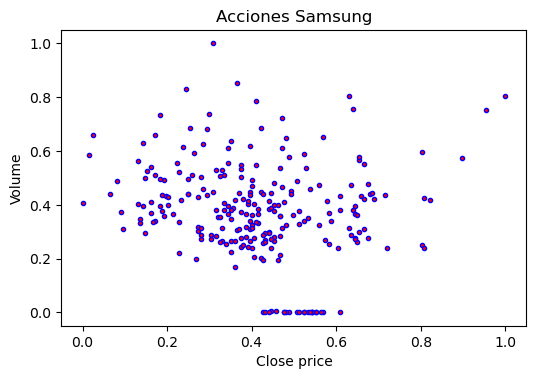

In [189]:
# Representación gráfica de los datos
x = df_escalado['Close'].values
y = df_escalado['Volume'].values
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.scatter(
    x ,
    y , 
    c = 'red',
    marker    = '.',
    edgecolor = 'blue', 
)
ax.set_title('Acciones Samsung');
plt.xlabel('Close price')
plt.ylabel('Volume')

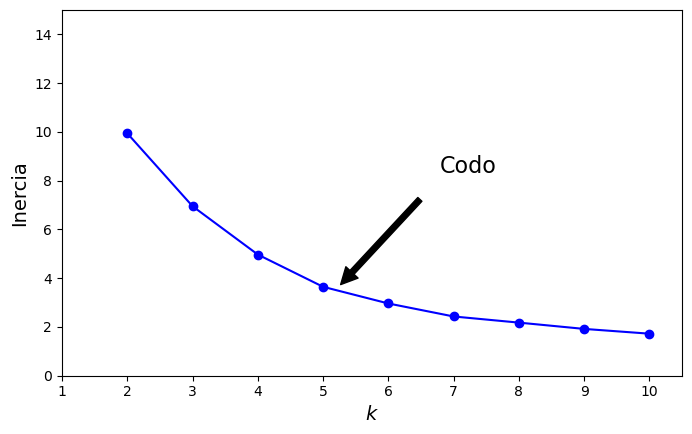

In [190]:
# definir ajuste K-medias
kmedias_k = [KMeans(n_clusters = k, 
                    random_state = 3,
                    n_init = 10).fit(df_escalado)
             for k in range(2, 11)]
inercias = [model.inertia_ for model in kmedias_k]

# pintar inercias
plt.figure(figsize=(8, 4.75))
plt.plot(range(2, 11), inercias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inercia", fontsize=14)
plt.annotate('Codo',
             xy=(5, inercias[4]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.15)
)
plt.axis([1, 10.5, 0, 15])
plt.xticks(range(1,11));
#plt.grid()
plt.show()

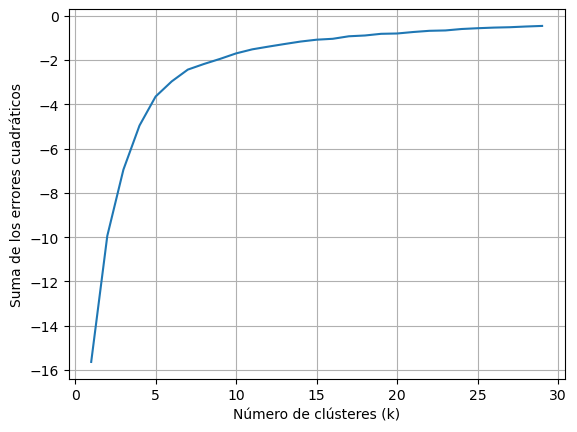

In [191]:
# Curva elbow para determinar valor óptimo de k
nc = range(1, 30) # El número de iteraciones que queremos hacer
kmeans = [KMeans(n_clusters=i) 
          for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado)
         for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.grid()
plt.plot(nc, score)

In [192]:
# Aplicación de k-means con k = 5
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.67420397 0.40422117]
 [0.3978875  0.32879531]
 [0.51048334 0.00089798]
 [0.17664975 0.44301571]
 [0.38028765 0.63976283]]


In [193]:
# Etiquetamos nuestro dataframe
labels = kmeans.fit_predict(df_escalado)
df['label'] = labels

In [194]:
# Añadimos la columna de fecha
df.insert(0, 'Date', dates)

In [195]:
df

,Date,Close,Volume,label
0,2022-06-02,66700000000,14959443,2
1,2022-06-03,66800000000,8222883,2
2,2022-06-07,65500000000,19355755,2
3,2022-06-08,65300000000,12483180,2
4,2022-06-09,65200000000,25790725,3
...,...,...,...,...
242,2023-05-24,68500000000,8192896,2
243,2023-05-25,68800000000,14231160,2
244,2023-05-26,70300000000,19549511,2
245,2023-05-30,72300000000,27476897,2


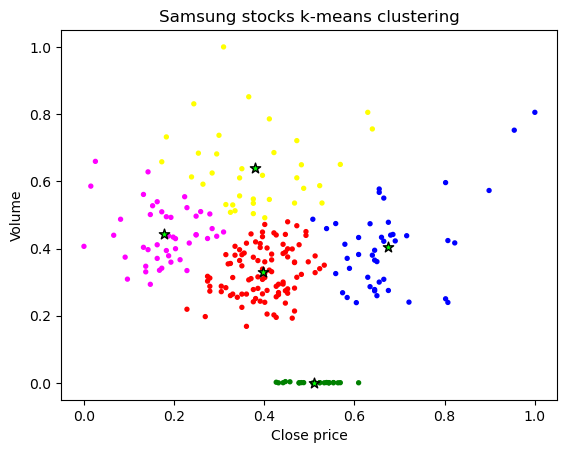

In [211]:
# Plot k-means clustering
colores=['red', 'green', 'blue', 'yellow', 'fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='lime', s=60, edgecolor = 'black') # Marcar centroides
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

In [212]:
close = 68500000000
volume = 17196370

nuevo_dato = pd.DataFrame([[close,volume]]) # Nueva muestra
nuevo_dato = nuevo_dato.rename(columns = {0: 'Close', 1: 'Volume'})

In [213]:
df_n = df.append(nuevo_dato)

In [214]:
df_n = df_n.drop('Date', 1)
df_n = df_n.drop('label', 1)
df_n = df_n.reset_index(drop=True)

In [215]:
df_n

,Close,Volume
0,66700000000,14959443
1,66800000000,8222883
2,65500000000,19355755
3,65300000000,12483180
4,65200000000,25790725
...,...,...
243,68800000000,14231160
244,70300000000,19549511
245,72300000000,27476897
246,71400000000,25666087


In [216]:
# normalizar
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df_n)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Close', 1: 'Volume'})

In [217]:
close_n = df_escalado['Close'][247]
volume_n = df_escalado['Volume'][247]
import numpy as np
X_new = np.array([[close_n, volume_n]]) # Nueva muestra

In [218]:
new_labels = kmeans.predict(X_new)
print("Clase:", new_labels)

Clase: [2]


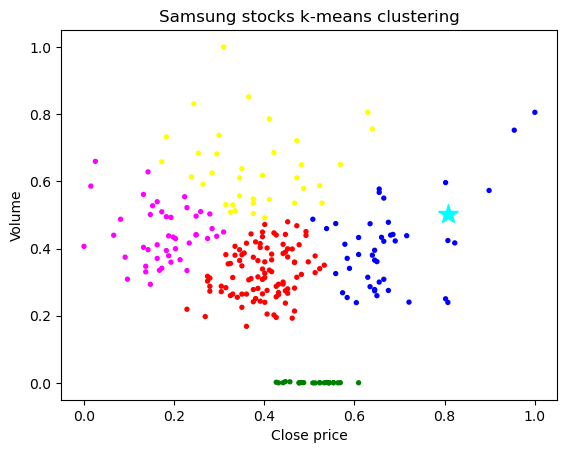

In [224]:
# Plot del nuevo dato clusterizado

colores=['red','green','blue','yellow','fuchsia']

asignar=[]
for row in labels:
     asignar.append(colores[row])

fig, ax = plt.subplots()
x_n = close_n
y_n = volume_n
 
plt.plot(x_n, y_n, '*', color = 'cyan', markersize = 15)
plt.scatter(x, y, c=asignar, s=8)
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Samsung stocks k-means clustering')
plt.show()

Fin